In [1]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io

data_prefix = 'xxx'

In [2]:
colors = {
    'asgd': 'darkred',
    'adadelta': 'red',
    'adagrad': 'orange',
    'adam': 'chocolate',
    'adamax': 'yellow',
    'lamb': 'lime',
    'rmsprop': 'seagreen',
    'sgd': 'teal',
    'rprop': 'purple'
}
def trim_all_columns(df):
    """
    Trim whitespace from ends of each value across all series in dataframe
    """
    trim_strings = lambda x: x.strip().lower() if isinstance(x, str) else x
    return df.applymap(trim_strings)

In [4]:
log_files   = glob(f'../checkpoints/{data_prefix}_*/_log.csv')
log_content = [pd.read_csv(log_file, header=None, names=['method', 'optimizer', 'n_epoch', 'epoch', 'loss_train', 'loss_test', 'psnr_train', 'psnr_test', 'time_train', 'time_test', 'Empty' ]) for log_file in log_files]
log_content = pd.concat(log_content)
log_content = trim_all_columns(log_content)
log_content = log_content.drop('Empty', axis=1)
log_content.head()

,method,optimizer,n_epoch,epoch,loss_train,loss_test,psnr_train,psnr_test,time_train,time_test
0,fsrcnn,adadelta,10,1,0.320056,0.179316,5.259010,14.927637,5.111026,0.014008
1,fsrcnn,adadelta,10,2,0.319506,0.178987,5.423147,14.943552,4.989191,0.010002
2,fsrcnn,adadelta,10,3,0.318955,0.178637,5.183261,14.960557,5.087365,0.012001
3,fsrcnn,adadelta,10,4,0.318360,0.178257,5.233179,14.979044,5.006985,0.013003
4,fsrcnn,adadelta,10,5,0.317712,0.177847,5.463772,14.999076,4.978133,0.014000


In [5]:
def draw_train_test(column_name, xlable="epoch", ylabel="error"):
    latex = [];
    methods = log_content.groupby('method').size().to_frame('cnt').reset_index()
    for idm,row in methods.iterrows():
        method = row.method
        optimizers = log_content[log_content.method == row.method].groupby(['optimizer']).size().reset_index()
        for ido, rowo in optimizers.iterrows():
            optimizer    = rowo.optimizer

            selected_row = log_content[(log_content.method == method) & (log_content.optimizer == optimizer)]

            # fig, ax = plt.subplots( nrows=1, ncols=1 )  # create figure & 1 axis
            # ax.plot([0,1,2], [10,20,3])
            # fig.savefig('path/to/save/image/to.png')   # save the figure to file
            # plt.close(fig)    # close the figure window

#             plt.figure(figsize=(18,4))
            plt.figure(figsize=(10,5))
            # ##########################################################
            plt.subplot(1, 2, 1)
            plt.rcParams['figure.figsize'] = (3,6)
            plt.legend(labels=['Train','Test'])
            plt.title(f'Error')
            plt.xlabel(xlable)
            plt.ylabel('error')

            chart1 = selected_row[column_name[0]]
            chart2 = selected_row[column_name[1]]
            plt.plot(chart1, '--r', label='Train')
            plt.plot(chart2, '-.b', label='Test')
            plt.legend()
            
            # ##########################################################
            plt.subplot(1, 2, 2)
            plt.rcParams['figure.figsize'] = (3,6)
            plt.legend(labels=['Train','Test'])
            plt.title(f'PSNR')
            plt.xlabel(xlable)
            plt.ylabel('PSNR')

            chart1 = selected_row['psnr_train']
            chart2 = selected_row['psnr_test']
            plt.plot(chart1, '--r', label='Train')
            plt.plot(chart2, '-.b', label='Test')
            plt.legend()
            
            
            # ##########################################################
            plt.suptitle(f'Method - Optimizer : {method} - {optimizer}')
            plt.savefig(f'./chapter3/images/error-psnr-{method}-{optimizer}.jpg')
            plt.show()
            
            plt.savefig(f'{method} - {optimizer}.jpg')
            
            
            latex.append({
                "method": method,
                "optimizer": optimizer,
                "uri": f"./images/error-psnr-"+method+"-"+optimizer+".jpg",
            })
    return latex

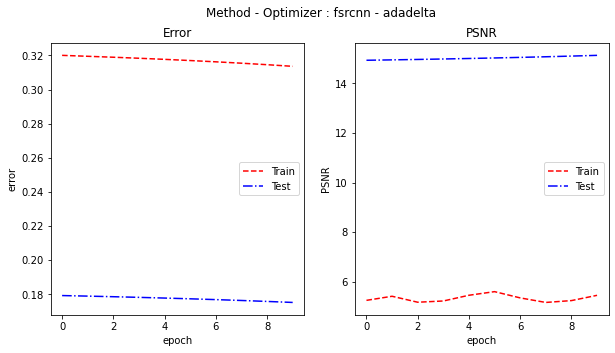

<Figure size 216x432 with 0 Axes>

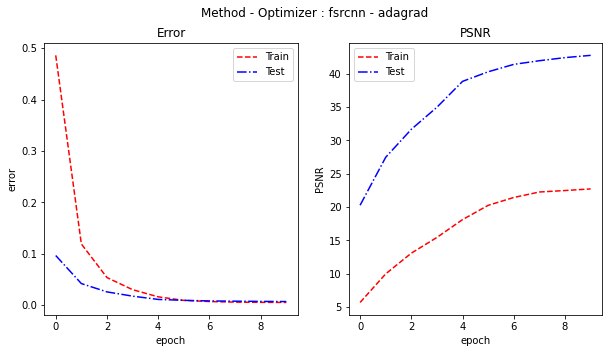

<Figure size 216x432 with 0 Axes>

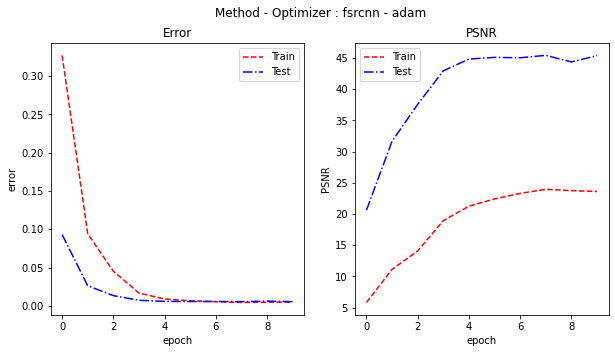

<Figure size 216x432 with 0 Axes>

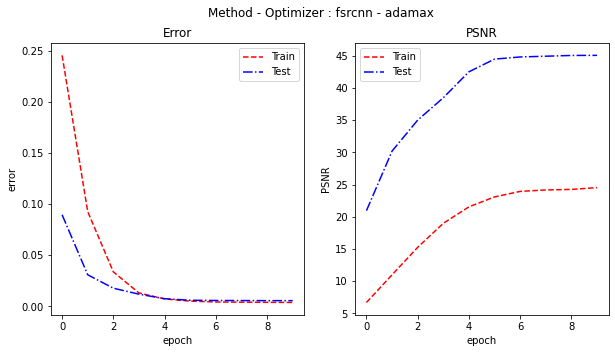

<Figure size 216x432 with 0 Axes>

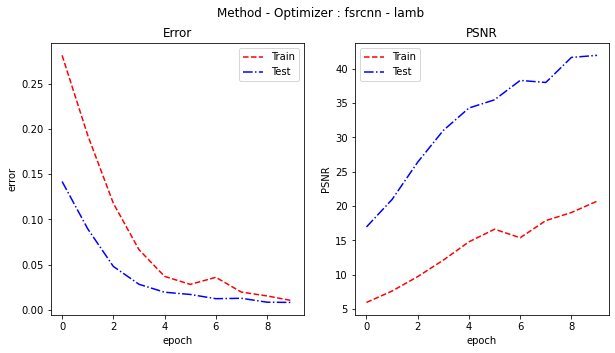

<Figure size 216x432 with 0 Axes>

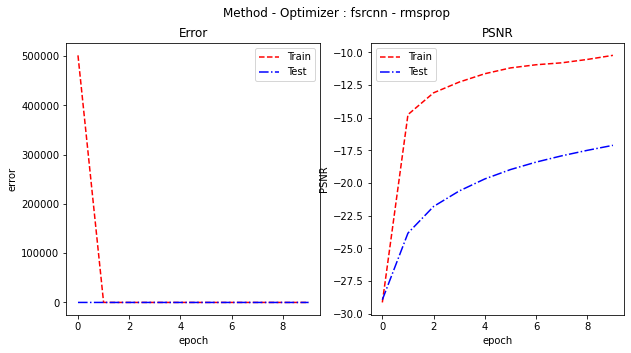

<Figure size 216x432 with 0 Axes>

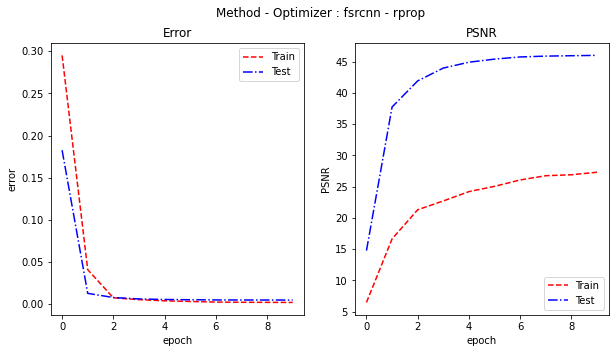

<Figure size 216x432 with 0 Axes>

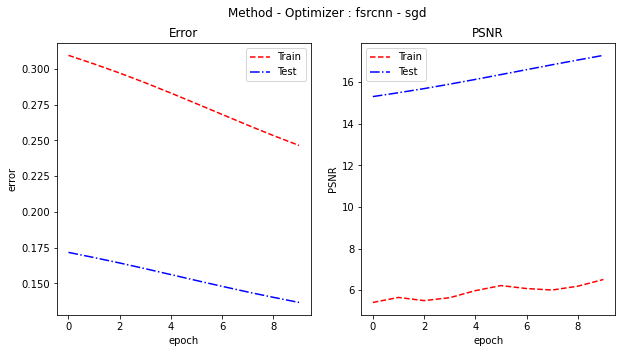

<Figure size 216x432 with 0 Axes>

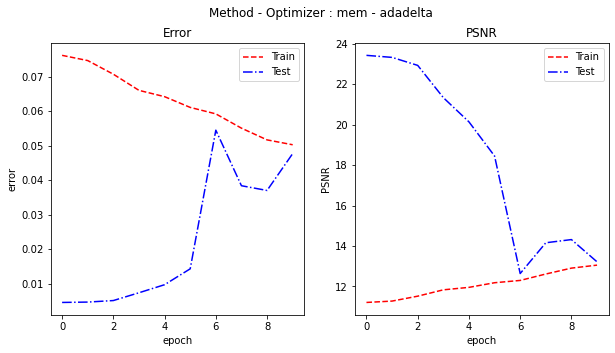

<Figure size 216x432 with 0 Axes>

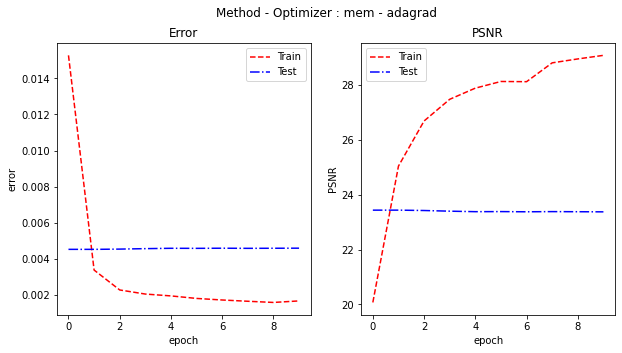

<Figure size 216x432 with 0 Axes>

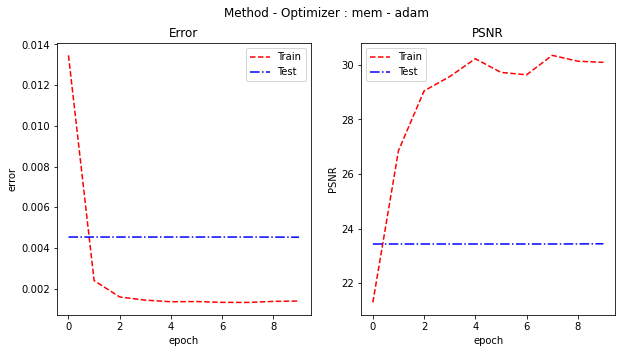

<Figure size 216x432 with 0 Axes>

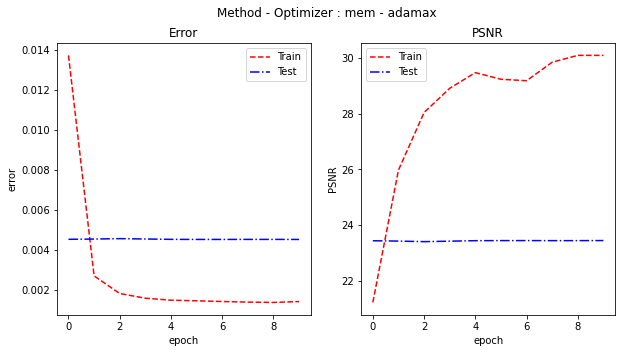

<Figure size 216x432 with 0 Axes>

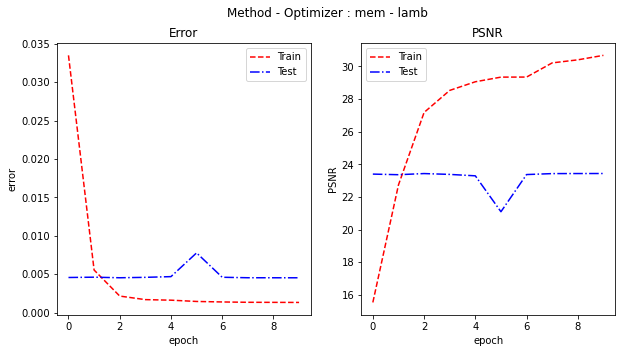

<Figure size 216x432 with 0 Axes>

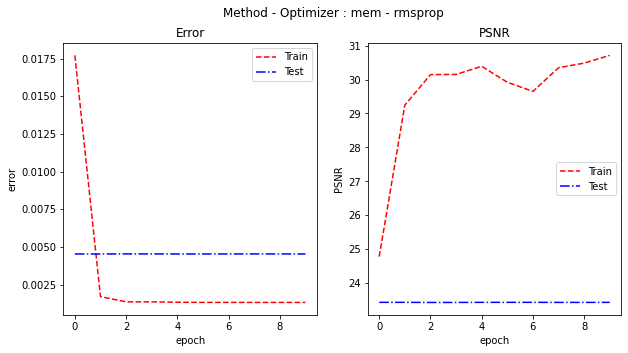

<Figure size 216x432 with 0 Axes>

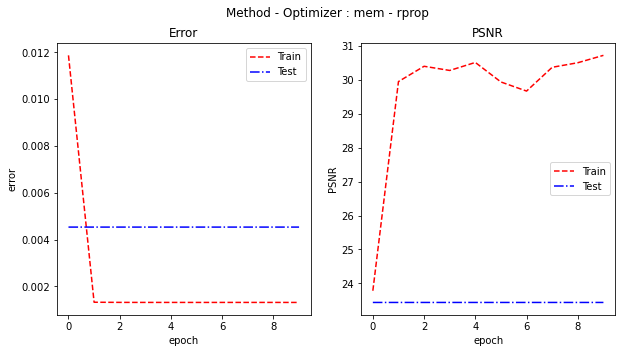

<Figure size 216x432 with 0 Axes>

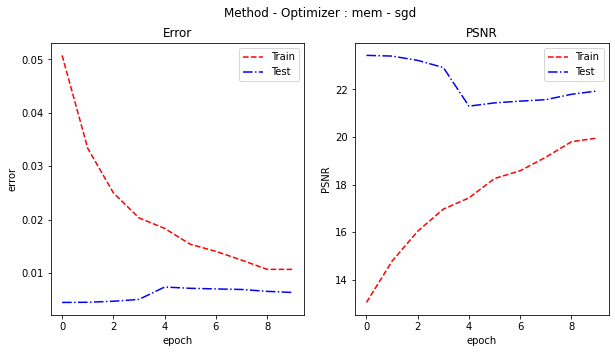

<Figure size 216x432 with 0 Axes>

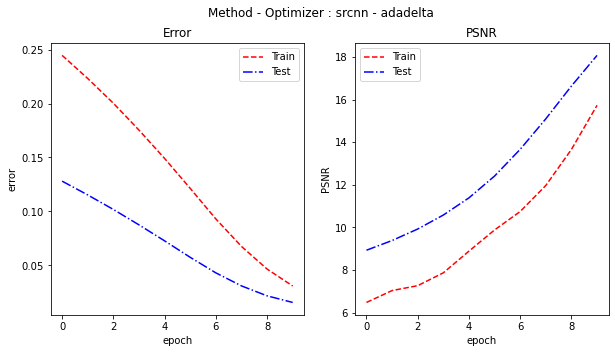

<Figure size 216x432 with 0 Axes>

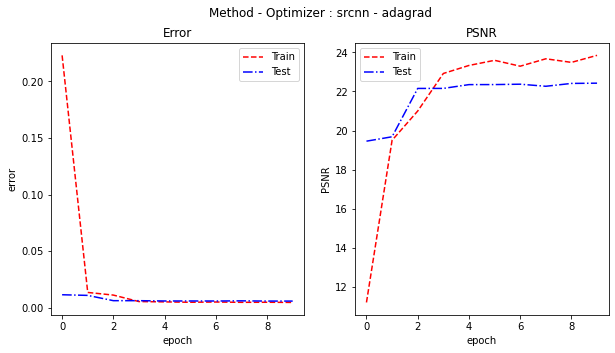

<Figure size 216x432 with 0 Axes>

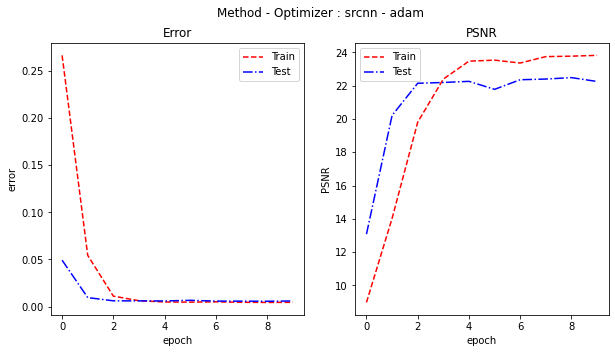

<Figure size 216x432 with 0 Axes>

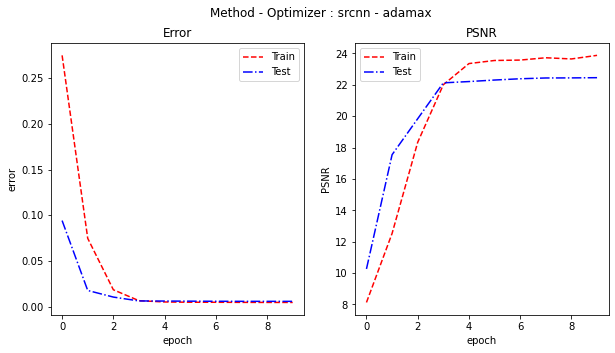

<Figure size 216x432 with 0 Axes>

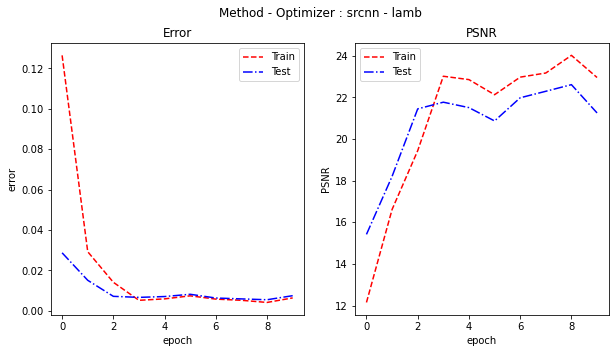

<Figure size 216x432 with 0 Axes>

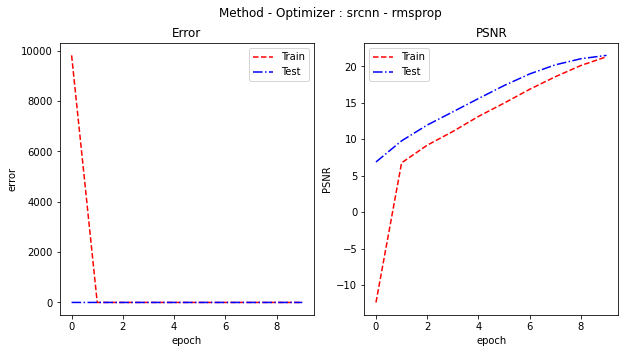

<Figure size 216x432 with 0 Axes>

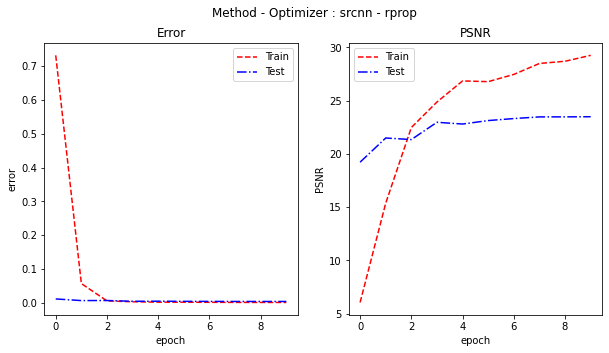

<Figure size 216x432 with 0 Axes>

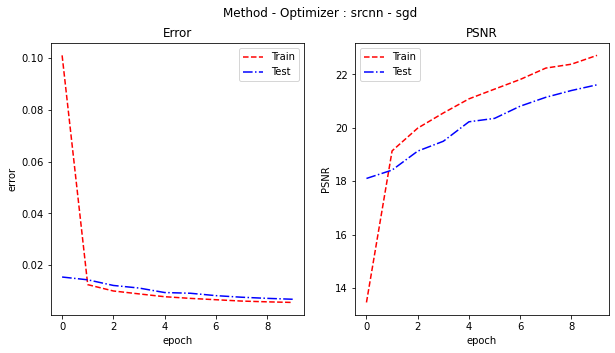

<Figure size 216x432 with 0 Axes>

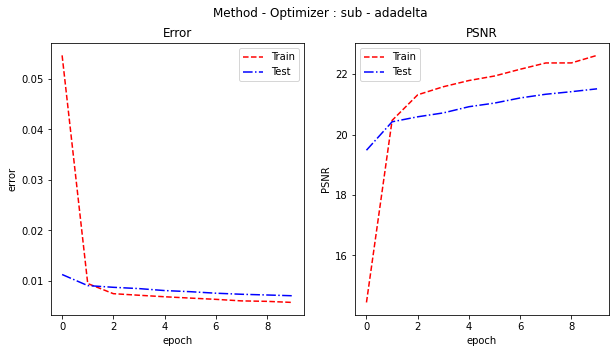

<Figure size 216x432 with 0 Axes>

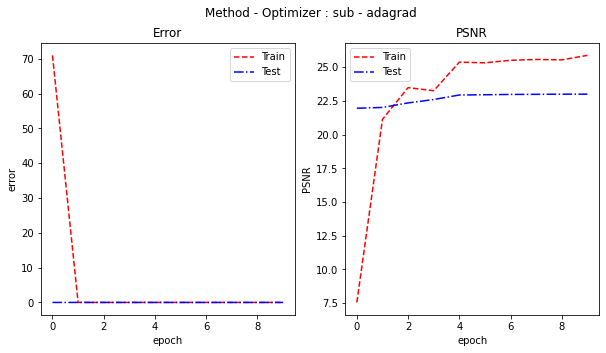

<Figure size 216x432 with 0 Axes>

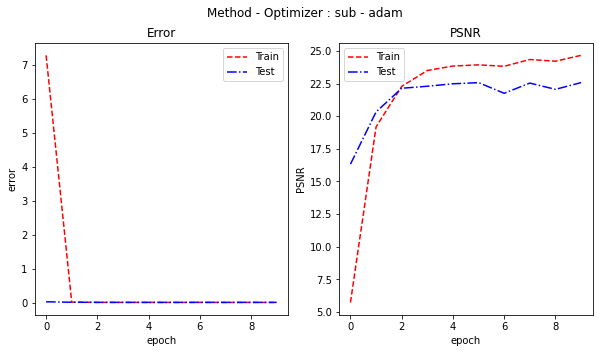

<Figure size 216x432 with 0 Axes>

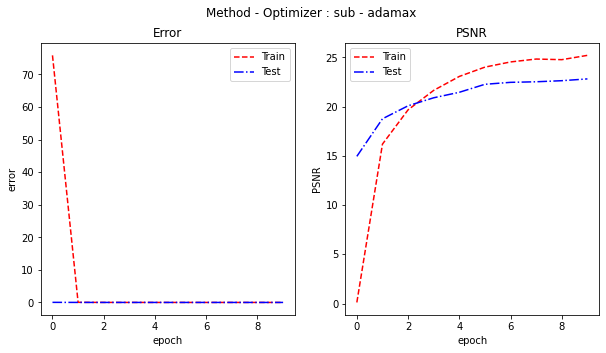

<Figure size 216x432 with 0 Axes>

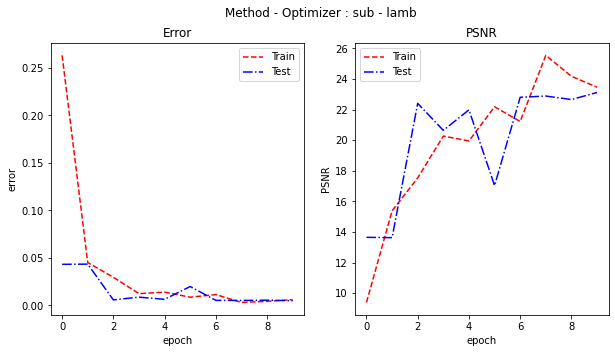

<Figure size 216x432 with 0 Axes>

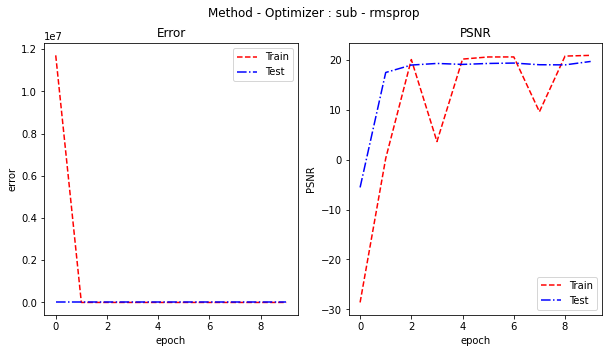

<Figure size 216x432 with 0 Axes>

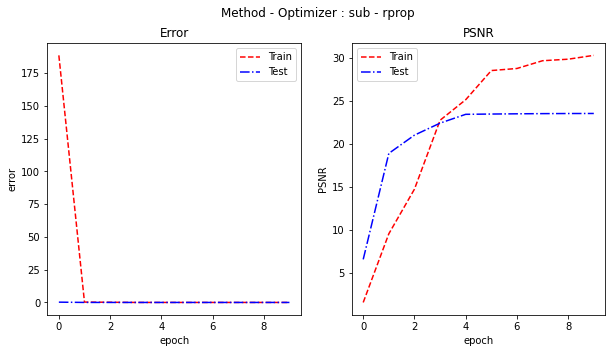

<Figure size 216x432 with 0 Axes>

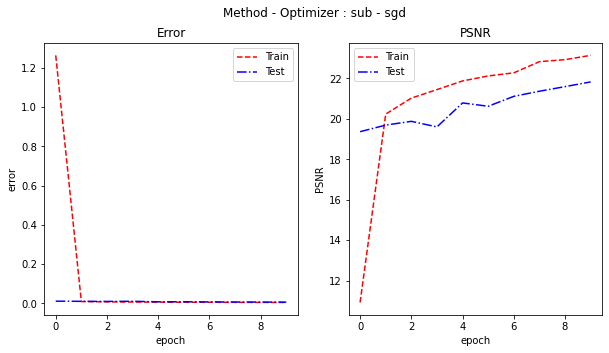

<Figure size 216x432 with 0 Axes>

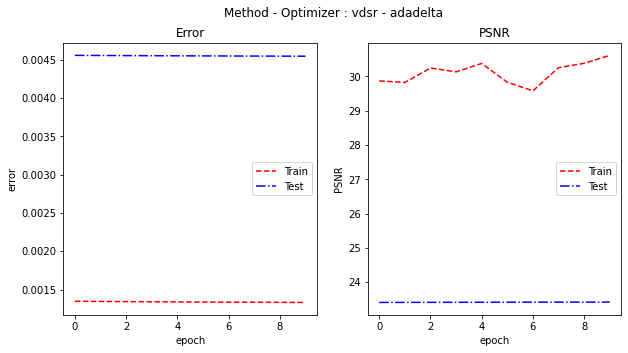

<Figure size 216x432 with 0 Axes>

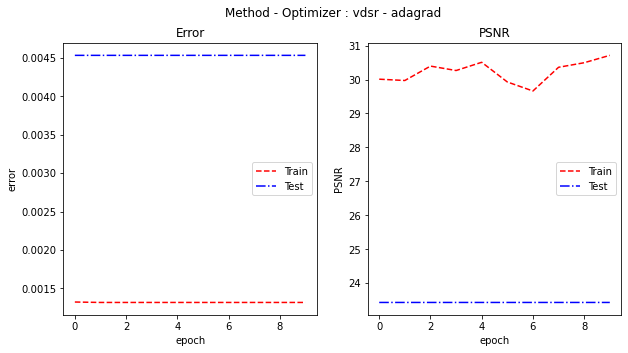

<Figure size 216x432 with 0 Axes>

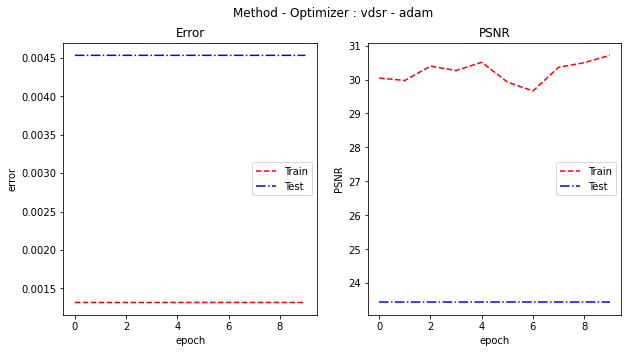

<Figure size 216x432 with 0 Axes>

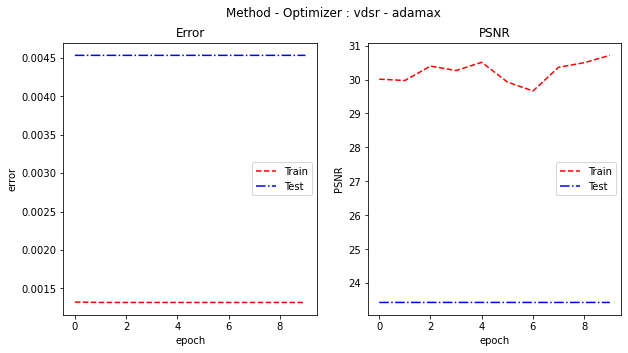

<Figure size 216x432 with 0 Axes>

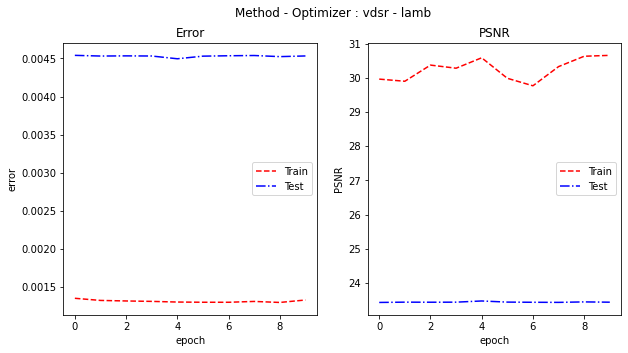

<Figure size 216x432 with 0 Axes>

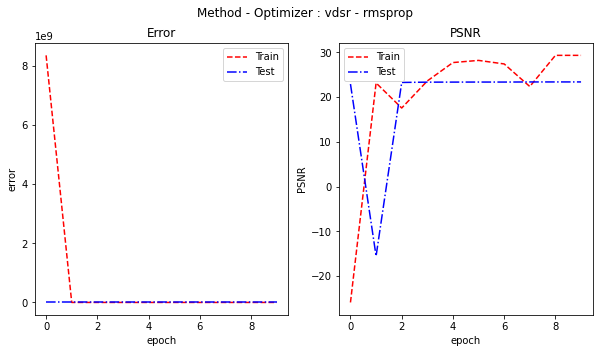

<Figure size 216x432 with 0 Axes>

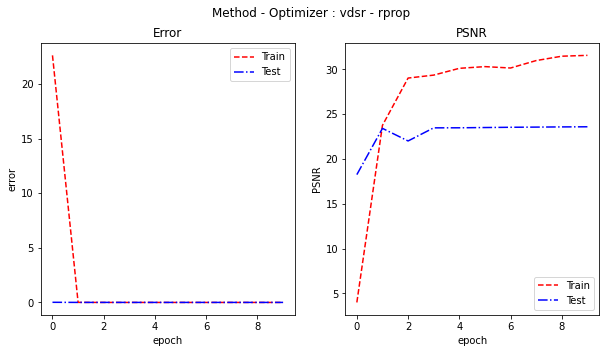

<Figure size 216x432 with 0 Axes>

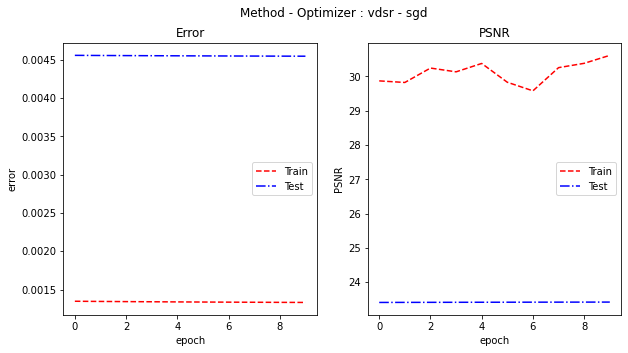

<Figure size 216x432 with 0 Axes>

In [6]:
latex = draw_train_test(column_name=['loss_train','loss_test'])

In [7]:
# Export Data for latex Error - PSNR

In [8]:
with io.open("./chapter3/report1.tex", "w", encoding="utf-8") as f:
#     f.write(" \\documentclass[12pt]{article}\n")
#     f.write(" \\usepackage{graphicx}\n")
#     f.write(" \\begin{document}")

    f.write("% !TEX TS-program = XeLaTeX\n")
    f.write("% !TeX root=../main.tex\n")
    for itm in latex:
        method    = itm['method']
        optimizer = itm['optimizer']
        output  = " \\begin{figure}[!h] \n"
        output += "       \\centering \n"
        output += "       \\includegraphics[width=160mm]{./chapter3/images/error-psnr-"+method+"-"+optimizer+".jpg}\n"
        output += "       \\caption{متد "+method+" الگوریتم بهینه سازی "+optimizer+"}\n"
        output += "       \\label{fig:error-psnr-"+method+"-"+optimizer+"}\n"
        output += " \\end{figure}\n"
        f.write(output)
#     f.write("\n \\end{document}")
    f.close()

In [62]:
def draw_digram(column_name, limits):
    report = column_name
    methods = log_content.groupby('method').size().to_frame('cnt').reset_index()
    for idm,row in methods.iterrows():
        method = row.method
        plt.xlabel('epoch')
        plt.ylabel(report)
        plt.title(f'Method: {method}')

        optimizer = log_content[log_content.method == row.method].groupby(['optimizer']).size().reset_index()
        for ido, rowo in optimizer.iterrows():
            selected_row = log_content[(log_content.method == row.method) & (log_content.optimizer == rowo.optimizer)]
            start_point  = 0
            end_point    = len(selected_row)
            color        = colors[rowo.optimizer.strip()]
            
            plt.plot(selected_row[report], color)
            
            limit = [start_point, end_point]
            limit.append(limits[0])
            limit.append(limits[1])
            plt.axis(limit)
        plt.legend(labels=optimizer.optimizer)

        plt.show()

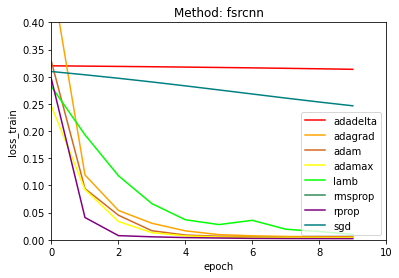

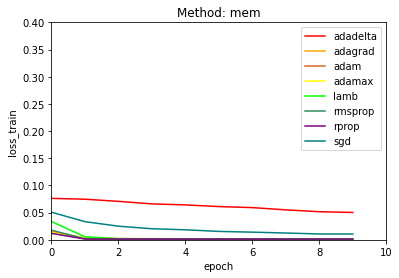

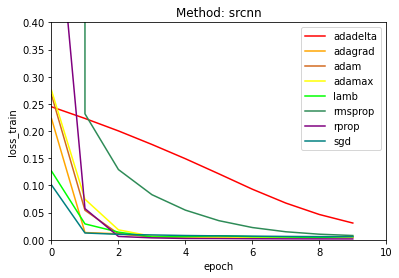

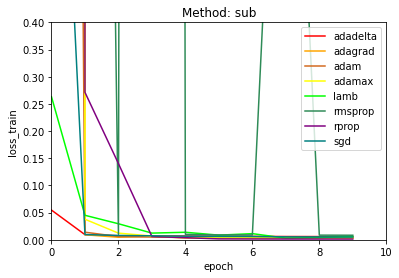

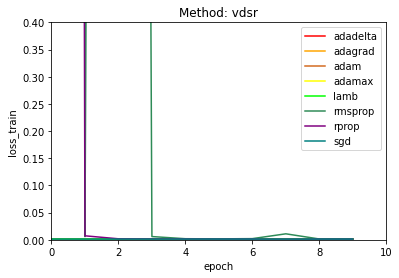

In [63]:
draw_digram('loss_train', [0, 0.4])

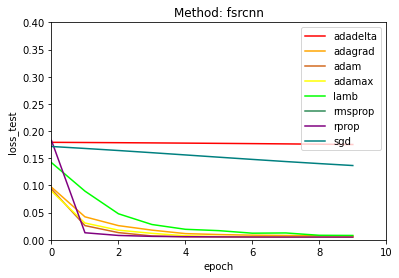

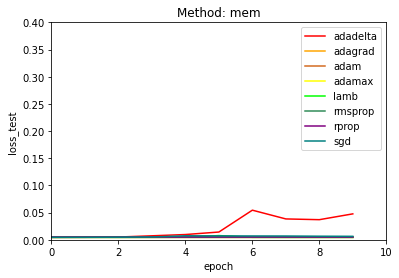

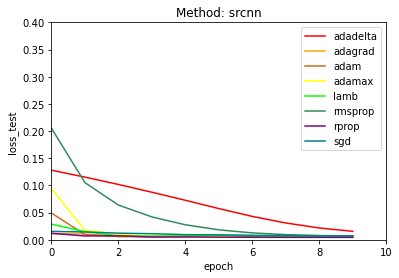

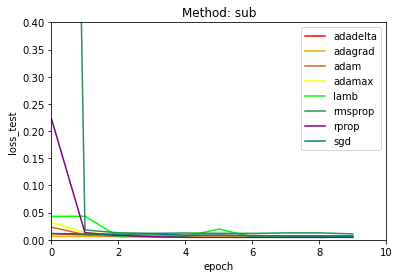

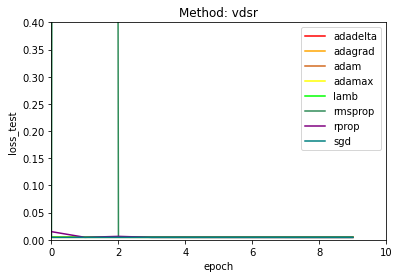

In [106]:
draw_digram('loss_test', [0, 0.4])

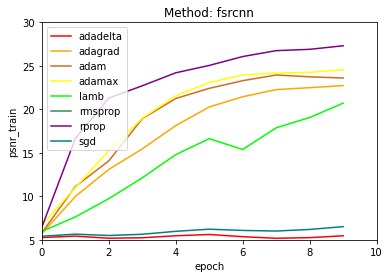

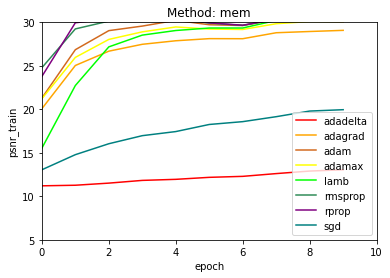

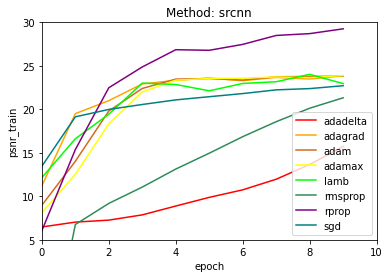

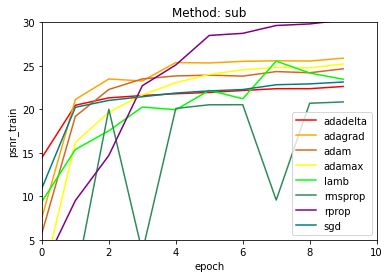

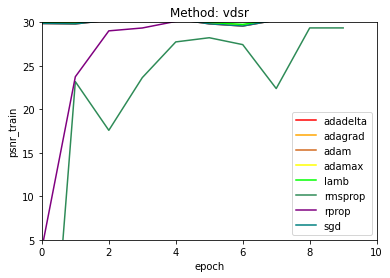

In [111]:
draw_digram('psnr_train', [5, 30])